In [5]:
##Sample save

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [7]:
X_train=np.loadtxt('E:\ML\Image Classification CNN Keras Dataset\input.csv', delimiter = ',')
Y_train=np.loadtxt('E:\ML\Image Classification CNN Keras Dataset\labels.csv', delimiter = ',')

X_test=np.loadtxt('E:\ML\Image Classification CNN Keras Dataset\input_test.csv', delimiter = ',')
Y_test=np.loadtxt('E:\ML\Image Classification CNN Keras Dataset\labels_test.csv', delimiter = ',')

In [8]:
X_train=X_train.reshape(len(X_train), 100, 100,3)
Y_train=Y_train.reshape(len(Y_train), 1)

X_test=X_test.reshape(len(X_test), 100, 100,3)
Y_test=Y_test.reshape(len(Y_test), 1)

X_train=X_train/255.0
X_test=X_test/255.0

X_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

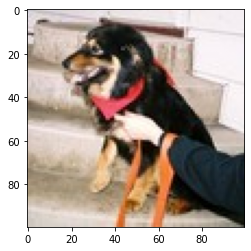

In [9]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu',),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.fit(X_train,Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 8s 251ms/step - loss: 0.4162 - accuracy: 0.8140
Epoch 2/10
32/32 [==============================] - 12s 376ms/step - loss: 0.3654 - accuracy: 0.8485
Epoch 3/10
32/32 [==============================] - 8s 249ms/step - loss: 0.3471 - accuracy: 0.8490
Epoch 4/10
32/32 [==============================] - 8s 249ms/step - loss: 0.3028 - accuracy: 0.8780
Epoch 5/10
32/32 [==============================] - 8s 247ms/step - loss: 0.2650 - accuracy: 0.8980
Epoch 6/10
32/32 [==============================] - 8s 245ms/step - loss: 0.2400 - accuracy: 0.9055
Epoch 7/10
32/32 [==============================] - 8s 239ms/step - loss: 0.2032 - accuracy: 0.9255
Epoch 8/10
32/32 [==============================] - 8s 239ms/step - loss: 0.1973 - accuracy: 0.9255
Epoch 9/10
32/32 [==============================] - 8s 248ms/step - loss: 0.1440 - accuracy: 0.9550
Epoch 10/10
32/32 [==============================] - 8s 246ms/step - loss: 0.1046 - accuracy: 0.976

In [16]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 30ms/step - loss: 0.8128 - accuracy: 0.7000


[0.8128255605697632, 0.699999988079071]

# Making Predictions

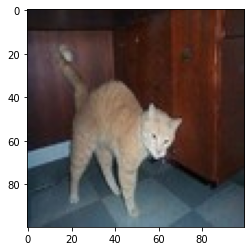

1/1 [==============================] - 0s 28ms/step
Our model says it is a:  cat


In [35]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a: ", pred)